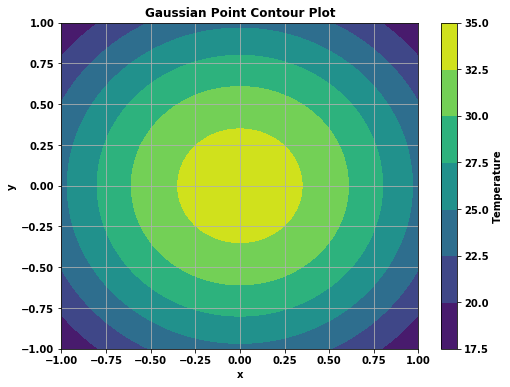

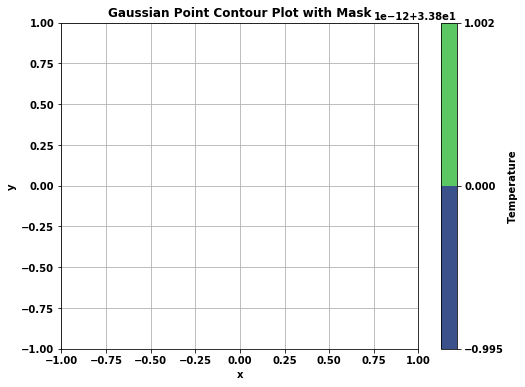

In [203]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def goussen_point(k, sigma, Temp, x, y, t):
    r = np.sqrt(x * x + y * y)
    numerator = np.sqrt(np.pi * (2 * sigma)) * Temp
    denominator = np.sqrt(np.pi * (2 * sigma + 4 * t * k))
    exponent = -(r * r) / (2 * sigma + 4 * t * k)
    u = numerator / denominator * np.exp(exponent)
    return u


def acutal_poin(t, temp, k):
    return temp * np.exp(-k*t)
# Parameters
L = 20
k = 0.03
Temp = 56.3-22.5
sigma = 1.55
# t = 1

# Create grid
x = np.linspace(-L, L, 101)
y = np.linspace(-L, L, 101)
X, Y = np.meshgrid(x, y)

t = 0
Z = goussen_point(k, sigma, Temp, X, Y, t)
rect_mask = np.zeros_like(Z)
rect_mask[np.logical_and(np.abs(X) <= 0.02, np.abs(Y) <= 0.02)] = "NaN"
# Apply mask to Z data
masked_Z = np.ma.masked_where(rect_mask == 0, Z)


# Calculate values of the function on the grid


# Create c1ontour plot
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar(label='Temperature')
plt.title('Gaussian Point Contour Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
# Create contour plot with masked data
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, masked_Z, cmap='viridis')
plt.colorbar(label='Temperature')
plt.title('Gaussian Point Contour Plot with Mask')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# Create rectangular mask




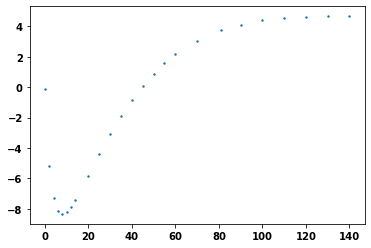

In [206]:
Temp_change = []
sigma = 0.2
k= 0.03
Temp = 56.3-22.5
time = np.array([0.0, 2, 4, 6, 8, 10, 1.2e+01, 1.4e+01, 2e+01, 2.5e+01, 3e+01, 3.5e+01, 4e+01, 4.5e+01, 5e+01, 5.5e+01, 6e+01, 7e+01, 8.1e+01, 9e+01, 1e+02, 1.1e+02, 1.2e+02, 1.3e+02, 1.4e+02])
for t in time:
    Z = goussen_point(k, sigma, Temp, X, Y, t)
    rect_mask = np.zeros_like(Z)
    rect_mask[np.logical_and(np.abs(X) <= 0.02, np.abs(Y) <= 0.02)] = "NaN"
    # Apply mask to Z data
    masked_Z = np.ma.masked_where(rect_mask == 0, Z)
    mean = np.mean(masked_Z)
    Temp_change.append(mean)


def actual_point(t, temp, k):
    return temp * np.exp(-k * t)


temp_data = actual_point(time, 33.9, 0.03)

# plt.scatter(time, Temp_change)
# plt.scatter(time, temp_data, s = 2 )

# plt.scatter(time, Temp_change)
plt.scatter(time,-temp_data+Temp_change, s = 2 )

Fitted Sigma: 17.852870999246214
Fitted k: 2.562754556743257


c:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
c:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


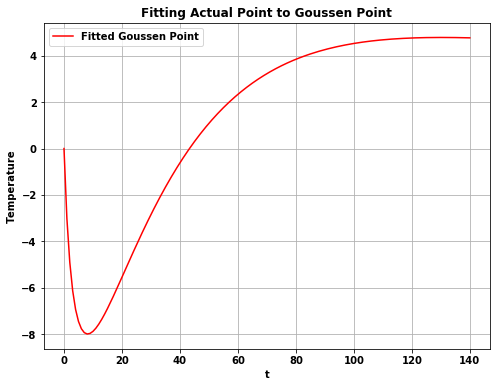

In [201]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def goussen_point(x, y, k, sigma, Temp, t):
    # k = 0.03
    r = np.sqrt(x * x + y * y)
    numerator = np.sqrt(np.pi * (2 * sigma)) * Temp
    denominator = np.sqrt(np.pi * (2 * sigma + 4 * t * k))
    exponent = -(r * r) / (2 * sigma + 4 * t * k)
    u = numerator / denominator * np.exp(exponent)
    return u

def actual_point(t, temp, k):
    return temp * np.exp(-k * t)

# Generate some synthetic data
t_data = np.linspace(0, 140, 141)
temp_data = actual_point(t_data, 33.9, 0.03)
sigma_guess = 5  # Initial guess for sigma

# Define the error function for curve fitting
def error_func(t, sigma, k):
    return goussen_point(0, 0, k, sigma, 33.9, t)

# Fit the model to the data
popt, pcov = curve_fit(error_func, t_data, temp_data, p0=[sigma_guess, 0.03])

# Extract fitted parameters
sigma_fit, k_fit = popt

print("Fitted Sigma:", sigma_fit)
print("Fitted k:", k_fit)

# Plot the results
plt.figure(figsize=(8, 6))
# plt.plot(t_data, temp_data, 'bo', label='Actual Data')
plt.plot(t_data, error_func(t_data, sigma_fit, k_fit)-temp_data, 'r-', label='Fitted Goussen Point')
plt.xlabel('t')
plt.ylabel('Temperature')
plt.title('Fitting Actual Point to Goussen Point')
plt.legend()
plt.grid(True)
plt.show()


Fitted Sigma: 0.20401417269600977


c:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt
c:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt
c:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice


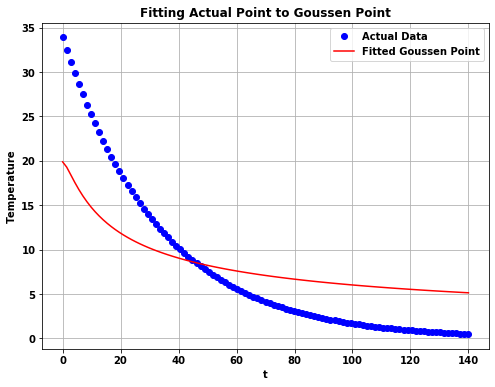

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define grid
L = 0.6
x = np.linspace(-L, L, 101)
y = np.linspace(-L, L, 101)
X, Y = np.meshgrid(x, y)

def goussen_point(x, y, k, sigma, Temp, t):
    # Ensure x, y are 2D arrays of the same shape
    x = np.atleast_2d(x)
    y = np.atleast_2d(y)
    
    r = np.sqrt(x**2 + y**2)  # Compute distance matrix
    numerator = np.sqrt(np.pi * (2 * sigma)) * Temp
    denominator = np.sqrt(np.pi * (2 * sigma + 4 * t * k))
    exponent = -(r**2) / (2 * sigma + 4 * t * k)  # Ensure exponent has the same shape as r
    u = numerator / denominator * np.exp(exponent)
    return u

def actual_point(t, temp, k):
    return temp * np.exp(-k * t)

def masked_goussen_point(X, Y, k, sigma, Temp, t, mask_size=0.02):
    Z = goussen_point(X, Y, k, sigma, Temp, t)
    rect_mask = np.logical_and(np.abs(X) <= mask_size, np.abs(Y) <= mask_size)
    Z[rect_mask] = np.nan
    return np.nanmean(Z)

# Generate some synthetic data
t_data = np.linspace(0.000001, 140, 101)
temp_data = actual_point(t_data, 33.9, 0.03)
sigma_guess = 5000 # Initial guess for sigma

# Define the error function for curve fitting
def error_func(t, sigma):
    return masked_goussen_point(X, Y, 0.03, sigma, 33.9, t)

# Fit the model to the data
popt, pcov = curve_fit(error_func, t_data, temp_data, p0=[sigma_guess])

# Extract fitted parameters
sigma_fit = popt[0]

# Calculate fitted temperature data using the fitted sigma
Temp_data = []
for t in t_data:
    mean_temp = masked_goussen_point(X, Y, 0.03, sigma_fit, 33.9, t)
    Temp_data.append(mean_temp)

# Print fitted parameter
print("Fitted Sigma:", sigma_fit)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(t_data, temp_data, 'bo', label='Actual Data')
plt.plot(t_data, Temp_data, 'r-', label='Fitted Goussen Point')
plt.xlabel('t')
plt.ylabel('Temperature')
plt.title('Fitting Actual Point to Goussen Point')
plt.legend()
plt.grid(True)
plt.show()


[56.4        54.42581769 52.5666028  50.81566017 49.16668449 47.61373768
 46.15122745 44.77388719 41.10471446 38.51322614 36.28271147 34.36288969
 32.71048378 31.28824484 30.06411243 29.0104919  28.10363231 26.65127292
 25.48444862 24.77826688 24.18778162 23.75033937 23.42627419 23.1862008
 23.00835005]
Fitted Sigma: 0.1


c:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice
c:\Program Files\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
c:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt
c:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt
c:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
c:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


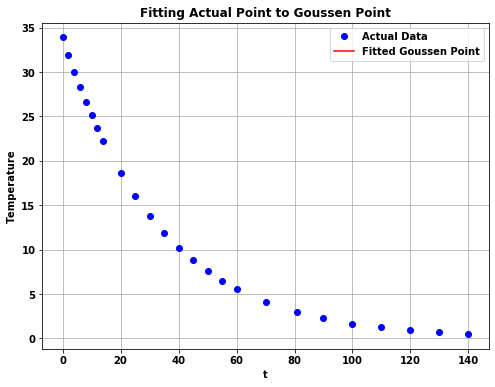

In [194]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define grid
L = 1
x = np.linspace(-L, L, 25)
y = np.linspace(-L, L, 25)
X, Y = np.meshgrid(x, y)

def goussen_point(x, y, k, sigma, Temp, t):
    # Ensure x, y are 2D arrays of the same shape
    x = np.atleast_2d(x)
    y = np.atleast_2d(y)
    
    r = np.sqrt(x**2 + y**2)  # Compute distance matrix
    numerator = np.sqrt(np.pi * (2 * sigma)) * Temp
    denominator = np.sqrt(np.pi * (2 * sigma + 4 * t * k))
    exponent = -(r**2) / (2 * sigma + 4 * t * k)  # Ensure exponent has the same shape as r
    u = numerator / denominator * np.exp(exponent)
    return u

def actual_point(t, temp, k):
    return temp * np.exp(-k * t)

def masked_goussen_point(X, Y, k, sigma, Temp, t, mask_size=1):
    Z = goussen_point(X, Y, k, sigma, Temp, t)
    rect_mask = np.logical_and(np.abs(X) <= mask_size, np.abs(Y) <= mask_size)
    Z[rect_mask] = np.nan
    # Check if there are valid values after masking
    if np.isnan(np.nanmean(Z)):
        return np.nan
    else:
        return np.nanmean(Z)


# rect_mask[np.logical_and(np.abs(X) <= 0.2, np.abs(Y) <= 0.2)] = "NaN"
# # Apply mask to Z data
# masked_Z = np.ma.masked_where(rect_mask == 0, Z)
# Generate some synthetic data
t_data = np.array([0.0, 2, 4, 6, 8, 10, 1.2e+01, 1.4e+01, 2e+01, 2.5e+01, 3e+01, 3.5e+01, 4e+01, 4.5e+01, 5e+01, 5.5e+01, 6e+01, 7e+01, 8.1e+01, 9e+01, 1e+02, 1.1e+02, 1.2e+02, 1.3e+02, 1.4e+02])
# t_data = np.linspace(0, 140, 101)
temp_data = actual_point(t_data, 33.9, 0.03)
print(temp_data + 22.5)
np.save("temp_data_ext_time", temp_data +22.5)
sigma_guess = 0.1  # Initial guess for sigma

# Define the error function for curve fitting
def error_func(t, sigma):
    return masked_goussen_point(X, Y, 0.03, sigma, temp_data, t) - actual_point(t, 33.9, 0.03)

# Fit the model to the data
popt, pcov = curve_fit(error_func, t_data, temp_data, p0=[sigma_guess])

# Extract fitted parameters
sigma_fit = popt[0]
Temp_data = []
for t in t_data:
    Z = goussen_point(0.03, sigma_fit, 33.9, X, Y, t)
    # print(np.mean(Z))
    rect_mask = np.zeros_like(Z)
    rect_mask[np.logical_and(np.abs(X) >= 0.1, np.abs(Y) >= 0.1)] = "NaN"
    # Apply mask to Z data
    masked_Z = np.ma.masked_where(rect_mask == 0, Z)
    Temp_data.append(np.mean(masked_Z))


print("Fitted Sigma:", sigma_fit)
# print(Temp_data)
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(t_data, temp_data, 'bo', label='Actual Data')
plt.plot(t_data, Temp_data , 'r-', label='Fitted Goussen Point')
plt.xlabel('t')
plt.ylabel('Temperature')
plt.title('Fitting Actual Point to Goussen Point')
plt.legend()
plt.grid(True)
plt.show()



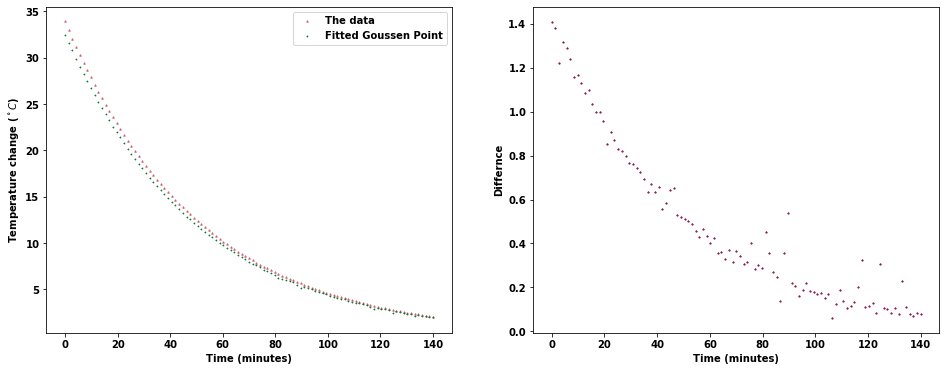

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import tol_colors as tc
color = tc.tol_cset("muted")

# Define grid
L = 1
x = np.linspace(-L, L, 101)
y = np.linspace(-L, L, 101)
X, Y = np.meshgrid(x, y)

def goussen_point(k, sigma, Temp, x, y, t):
    r = np.sqrt(x**2 + y**2)  # Compute distance matrix
    numerator = np.sqrt(np.pi * (2 * sigma)) * Temp
    denominator = np.sqrt(np.pi * (2 * sigma + 4 * t * k))
    exponent = -(r**2) / (2 * sigma + 4 * t * k)  # Ensure exponent has the same shape as r
    u = numerator / denominator * np.exp(exponent)
    return u

def actual_point(t, temp, k):
    return temp * np.exp(-k * t)



# Generate some synthetic data
t_data = np.linspace(0, 140,101)
# t_data = np.array([0.0, 2, 4, 6, 8, 10, 1.2e+01, 1.4e+01, 2e+01, 2.5e+01, 3e+01, 3.5e+01, 4e+01, 4.5e+01, 5e+01, 5.5e+01, 6e+01, 7e+01, 8.1e+01, 9e+01, 1e+02, 1.1e+02, 1.2e+02, 1.3e+02, 1.4e+02])
temp_data = actual_point(t_data, 33.9, 0.02) 
np.save("temperture_data_int_56.4", temp_data)
# print(temp_data)
# sigma_guess = 50  # Initial guess for sigma

# Define the error function for curve fitting
# def error_func(t, sigma):
#     return goussen_point(0.02, sigma, temp_data, x,y, t_data) - actual_point(t, 33.9, 0.02)

# # Fit the model to the data
# popt, pcov = curve_fit(error_func, t_data, temp_data, p0=[sigma_guess])
# # perr = np.sqrt(np.diag(pcov))
# # Extract fitted parameters
# sigma_fit = popt[0]
# # 
# # print("Fitted Sigma:", sigma_fit)

# # Calculate the masked Gaussian points for each t in t_data
# Temp_data = [masked_goussen_point(0.02, sigma_fit, temp,x,y, t) for t, temp in zip(t_data, temp_data)]

TE1 = 0
TE2 = 20
# alpha1 = -2.571829546* 10 ** (-9)
alpha1 = -0.55991439 * 10 ** (-9)
# alpha1 = -3.862496453 * 10 ** (-9)
phase = np.load("simulations/sim_temp_motion/output/temp_decay/Delay_0_20_3DSE_3DSE-Tref_22.5-T_56.3res_0.001_rad_0.02_bc_script_widening_gaussian_copy_T1_1.27_T2_0.171_bc_time_unit_ms_bc_sigma_1000000.0_shape_rectangle_phase_data.npy")
tempe = phase/((2.6752218744 * 10**8) * alpha1 * 9.6 * (TE2- TE1)*10**(-3))
# Plot the results
import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
# Plot the actual data points on the first subplot
ax1.scatter(t_data, temp_data, s = 2, color = color.rose, marker="^" , linewidths=1,  label='The data ')
ax1.scatter(t_data, tempe, s = 2, color = color.green, marker="4", linewidths=1,  label='Fitted Goussen Point')
ax1.set_xlabel('Time (minutes)')
ax1.set_ylabel('Temperature change ($^\circ C$)')
ax1.legend()
# ax1.grid(True)

# Plot the fitted Goussen points on the second subplot

difference = -tempe + temp_data
ax2.scatter(t_data, difference, s = 2, color = color.wine, marker="*", linewidths=1)
ax2.set_xlabel('Time (minutes)')
ax2.set_ylabel('Differnce')
# ax2.autoscale(enable=True, axis='y')


# Show the plot
plt.show()


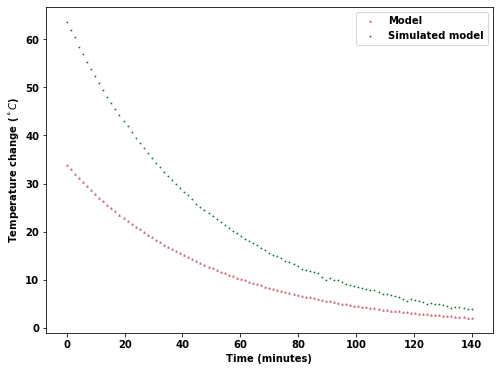

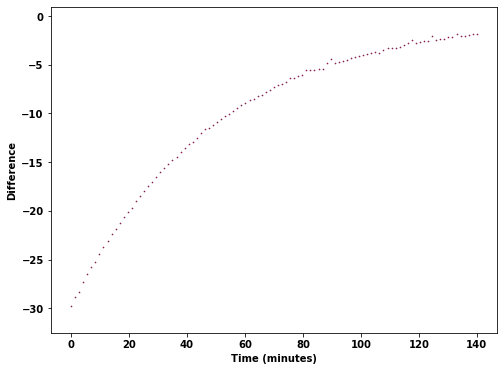

In [126]:
import matplotlib.pyplot as plt
import json

# Your dictionary
metadate = {
    'phase data location':"simulations/sim_temp_motion/output/temp_decay/Delay_0_20_SE_matching_simulation_SE_matching_simulation-Tref_22.5-T_56.3res_0.001_rad_0.02_bc_script_widening_gaussian_copy_T1_1.27_T2_0.171_bc_time_unit_ms_bc_sigma_1000000.0_shape_rectangle_phase_data.npy",
    'alpha value': f'{alpha1}',
    "TE times" : f"{TE1} and {TE2}",
    "Temperture": f"phase/((2.6752218744 * 10**8) * {alpha1} * 4 * ({TE2}- {TE1})*10**(-3))",
    "code used to creat mode":"Mininctking_code.ipynb"
}

# Specify the file name
file_name = 'simulations/sim_temp_motion/output/Thesis_graphs/Temp_dacy_from_data_SE.json'

# Write the dictionary to a JSON file
with open(file_name, 'w') as json_file:
    json.dump(metadate, json_file, indent=4)

# First plot: Actual data points and fitted Goussen points
plt.figure(figsize=(8, 6))
plt.scatter(t_data, temp_data, s=2, color=color.rose, marker="^", linewidths=1, label='Model')
plt.scatter(t_data, tempe, s=2, color=color.green, marker="4", linewidths=1, label='Simulated model')
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature change ($^\circ C$)')
plt.legend()
plt.autoscale(enable=True, axis='y')
# plt.grid(True)  # Uncomment this line if you want to add a grid
# plt.title('Actual Data and Fitted Goussen Points')
plt.savefig("simulations/sim_temp_motion/output/Thesis_graphs/Temp_dacy_from_data_SE.pdf")
# plt.close()
# Second plot: Difference between actual data and fitted points

min_diff = min(difference)
max_diff = max(difference)
padding = (max_diff - min_diff) * 0.1  # Add 10% padding

difference = -tempe + temp_data
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(t_data, difference, s=2, color=color.wine, marker="*", linewidths=0.5)
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Difference')
# ax.set_title('Difference Between Actual Data and Fitted Goussen Points')
ax.set_ylim(min_diff - padding, max_diff + padding)
plt.savefig("simulations/sim_temp_motion/output/Thesis_graphs/Temp_dacy_from_data_SE_difference_plot.pdf")   # Ensure y-axis is autoscaled
# plt.show()


Fitted Sigma: 6843702.303129468
Fitted k: 495181.22329697845
Parameter standard deviations: [4.98658740e+12 3.60808291e+11]


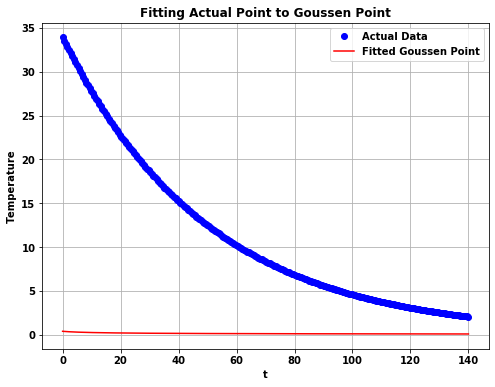

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define grid
L = 1
x = np.linspace(-L, L, 256)
y = np.linspace(-L, L, 256)
X, Y = np.meshgrid(x, y)

def goussen_point(k, sigma, Temp, x, y, t):
    r = np.sqrt(x**2 + y**2)  # Compute distance matrix
    numerator = np.sqrt(np.pi * (2 * sigma)) * Temp
    denominator = np.sqrt(np.pi * (2 * sigma + 4 * t * k))
    exponent = -(r**2) / (2 * sigma + 4 * t * k)
    u = numerator / denominator * np.exp(exponent)
    return u

def actual_point(t, temp, k):
    return temp * np.exp(-k * t)

def masked_goussen_point(X, Y, k, sigma, Temp, t, mask_size=0.01):
    Z = goussen_point(k, sigma, Temp, X, Y, t)
    rect_mask = np.logical_and(np.abs(X) <= mask_size, np.abs(Y) <= mask_size)
    Z[rect_mask] = np.nan
    return np.nanmean(Z)

# Generate some synthetic data
t_data = np.linspace(0, 140, 256)
temp_data = actual_point(t_data, 33.9, 0.02)

# Normalize temp_data for better numerical stability
temp_data_normalized = temp_data / np.max(temp_data)

# Initial guesses for parameters
sigma_guess = 0.1
k_guess = 0.02

# Define the error function for curve fitting
def error_func(t, sigma, k):
    return np.array([masked_goussen_point(X, Y, k, sigma, 33.9, t_i) for t_i in t]) / np.max(temp_data) - actual_point(t, 33.9, k) / np.max(temp_data)

# Fit the model to the data with parameter bounds
bounds = ([0, 0], [np.inf, np.inf])
popt, pcov = curve_fit(error_func, t_data, temp_data_normalized, p0=[sigma_guess, k_guess], bounds=bounds)
perr = np.sqrt(np.diag(pcov))

# Extract fitted parameters
sigma_fit, k_fit = popt
print("Fitted Sigma:", sigma_fit)
print("Fitted k:", k_fit)
print("Parameter standard deviations:", perr)

# Calculate the masked Gaussian points for each t in t_data
Temp_data = [masked_goussen_point(X, Y, k_fit, sigma_fit, 0.39, t) for t in t_data]

# Rescale Temp_data back to the original scale
Temp_data = np.array(Temp_data)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(t_data, temp_data, 'bo', label='Actual Data')
plt.plot(t_data, Temp_data, 'r-', label='Fitted Goussen Point')
plt.xlabel('t')
plt.ylabel('Temperature')
plt.title('Fitting Actual Point to Goussen Point')
plt.legend()
plt.grid(True)
plt.show()




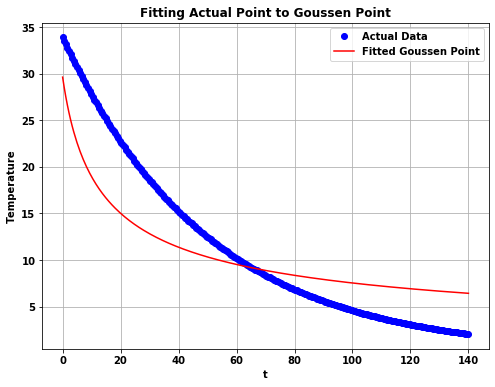

In [98]:
# Calculate the masked Gaussian points for each t in t_data
Temp_data = [masked_goussen_point(X, Y, k_fit, sigma_fit, 0.39, t) for t in t_data]

# Rescale Temp_data back to the original scale
Temp_data = np.array(Temp_data) * 76

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(t_data, temp_data, 'bo', label='Actual Data')
plt.plot(t_data, Temp_data, 'r-', label='Fitted Goussen Point')
plt.xlabel('t')
plt.ylabel('Temperature')
plt.title('Fitting Actual Point to Goussen Point')
plt.legend()
plt.grid(True)
plt.show()

Fitted Sigma: 19480367.246855825
Fitted k: 0.0026284968878426233
Parameter standard deviations: [3.20199973e+13 8.02769253e-04]


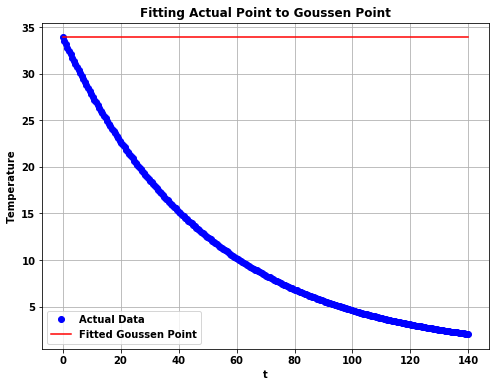

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define grid
L = 1
x = np.linspace(-L, L, 256)
y = np.linspace(-L, L, 256)
X, Y = np.meshgrid(x, y)

def goussen_point(k, sigma, Temp, X, Y, t):
    r = np.sqrt(X**2 + Y**2)  # Compute distance matrix
    numerator = np.sqrt(np.pi * (2 * sigma)) * Temp
    denominator = np.sqrt(np.pi * (2 * sigma + 4 * t * k))
    exponent = -(r**2) / (2 * sigma + 4 * t * k)
    u = numerator / denominator * np.exp(exponent)
    return u

def actual_point(t, temp, k):
    return temp * np.exp(-k * t)

def masked_goussen_point(X, Y, k, sigma, Temp, t, mask_size=0.1):
    Z = goussen_point(k, sigma, Temp, X, Y, t)
    rect_mask = np.logical_and(np.abs(X) <= mask_size, np.abs(Y) <= mask_size)
    Z[rect_mask] = np.nan
    return np.nanmean(Z)

# Generate some synthetic data
t_data = np.linspace(0, 140, 256)
temp_data = actual_point(t_data, 33.9, 0.02)
sigma_guess =10  # Initial guess for sigma
k_guess = 0.002  # Initial guess for k

# Define the error function for curve fitting
def error_func(t, params):
    sigma, k = params
    return np.array([masked_goussen_point(X, Y, k, sigma, 33.9, t_i) for t_i in t]) - actual_point(t, 33.9, k)

# Fit the model to the data
initial_guess = [sigma_guess, k_guess]
popt, pcov = curve_fit(lambda t, sigma, k: error_func(t, [sigma, k]), t_data, temp_data, p0=initial_guess)
perr = np.sqrt(np.diag(pcov))

# Extract fitted parameters
sigma_fit, k_fit = popt
print("Fitted Sigma:", sigma_fit)
print("Fitted k:", k_fit)
print("Parameter standard deviations:", perr)

# Calculate the masked Gaussian points for each t in t_data
Temp_data = np.array([masked_goussen_point(X, Y, k_fit, sigma_fit, 33.9, t) for t in t_data])

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(t_data, temp_data, 'bo', label='Actual Data')
plt.plot(t_data, Temp_data, 'r-', label='Fitted Goussen Point')
plt.xlabel('t')
plt.ylabel('Temperature')
plt.title('Fitting Actual Point to Goussen Point')
plt.legend()
plt.grid(True)
plt.show()


Fitted Temp: -8.055215135723323


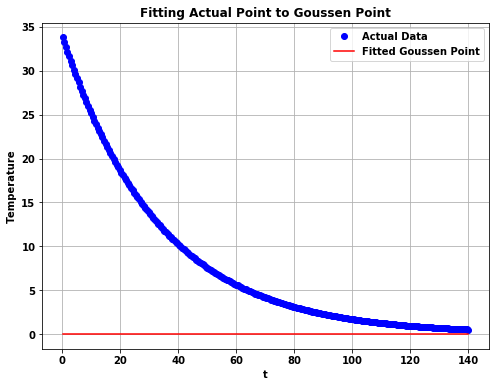

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define grid
L = 0.6
x = np.linspace(-L, L, 256)
y = np.linspace(-L, L, 256)
X, Y = np.meshgrid(x, y)

def goussen_point(Temp, k, x, y, t):
    denominator = (4 * np.pi * t)**(3/2) * np.sqrt(k * k)
    exponent = -((x)**2 / (4 * k * t) + (y)**2 / (4 * k * t))
    return Temp / denominator * np.exp(exponent) * 0.999998/44896780.53129164

def actual_point(t, temp, k):
    return temp * np.exp(-k * t)

def masked_goussen_point(Temp, k, t, mask_size=0.0001):
    Z = goussen_point(Temp, k, X, Y, t)
    rect_mask = np.logical_and(np.abs(X) <= mask_size, np.abs(Y) <= mask_size)
    Z[rect_mask] = np.nan
    return np.nanmean(Z)

# Generate some synthetic data
t_data = np.linspace(0.1, 140, 256)  # Adjusted to avoid division by zero
temp_data = actual_point(t_data, 33.9, 0.03)
Temp_guess = 1000  # Initial guess for Temp

# Define the error function for curve fitting
def error_func(t, Temp):
    return masked_goussen_point(Temp, 0.0001, t) - actual_point(t, Temp, 0.0001)

# Fit the model to the data
popt, pcov = curve_fit(error_func, t_data, temp_data, p0=[Temp_guess])

# Extract fitted parameters
Temp_fit = popt[0]

print("Fitted Temp:", Temp_fit)

# Calculate the masked Gaussian points for each t in t_data
Temp_data = [masked_goussen_point(Temp_fit, 0.03, t) for t in t_data]

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(t_data, temp_data, 'bo', label='Actual Data')
plt.plot(t_data, Temp_data , 'r-', label='Fitted Goussen Point')
plt.xlabel('t')
plt.ylabel('Temperature')
plt.title('Fitting Actual Point to Goussen Point')
plt.legend()
plt.grid(True)
plt.show()



Fitted Temp: 46039300.34918426


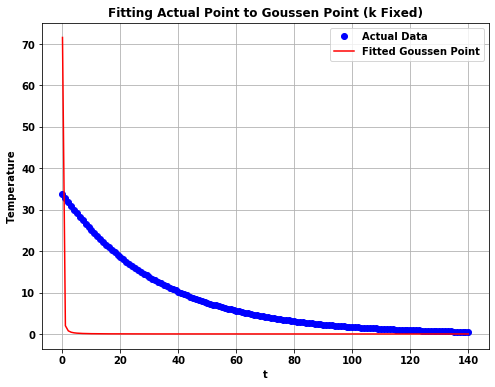

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def goussen_point(Temp, k, x, y, t):
    denominator = (4 * np.pi * t)**(3/2) * np.sqrt(k * k)
    exponent = -((x)**2 / (4 * k * t) + (y)**2 / (4 * k * t))
    exponent1 = -((x+0.01)**2 / (4 * k * t) + (y+0.01)**2 / (4 * k * t))
    exponent2 = -((x-0.01)**2 / (4 * k * t) + (y-0.01)**2 / (4 * k * t))
    exponent = -((x+0.01)**2 / (4 * k * t) + (y+0.01)**2 / (4 * k * t))
    Temp_1 = Temp / denominator * np.exp(exponent) * 0.999998/44896780.53129164
    Temp_2 = Temp / denominator * np.exp(exponent1) * 0.999998/44896780.53129164
    Temp_3 = Temp / denominator * np.exp(exponent2) * 0.999998/44896780.53129164
    return  Temp_1 + Temp_2 + Temp_3

def actual_point(t, temp, k):
    return temp * np.exp(-k * t)

# Generate some synthetic data
t_data = np.linspace(0.1, 140, 141)  # Adjusted to avoid division by zero
temp_data = actual_point(t_data, 33.9, 0.03)
sigma_guess = 0.1  # Initial guess for sigma

# Define the error function for curve fitting
def error_func(t, Temp):
    k = 0.03  # Fixed value for k
    return goussen_point(Temp, k, 0, 0, t) - temp_data

# Fit the model to the data
popt, pcov = curve_fit(error_func, t_data, temp_data, p0=[33.9])

# Extract fitted parameters
Temp_fit = popt[0]

print("Fitted Temp:", Temp_fit)

# Calculate the fitted temperatures for each t in t_data
fitted_temp_data = [goussen_point(Temp_fit, 0.03, 0, 0, t) for t in t_data]

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(t_data, temp_data, 'bo', label='Actual Data')
plt.plot(t_data, fitted_temp_data, 'r-', label='Fitted Goussen Point')
plt.xlabel('t')
plt.ylabel('Temperature')
plt.title('Fitting Actual Point to Goussen Point (k Fixed)')
plt.legend()
plt.grid(True)
plt.show()


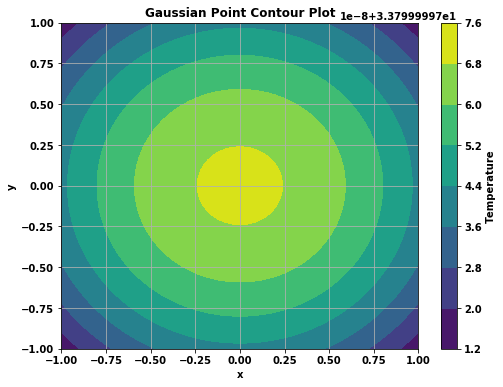

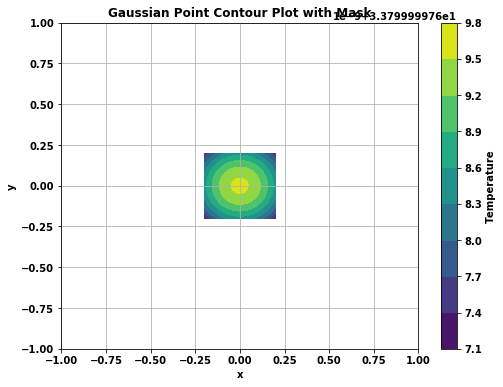

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def goussen_point(k, sigma, Temp, x, y, t):
    r = np.sqrt(x * x + y * y)
    numerator = np.sqrt(np.pi * (2 * sigma)) * Temp
    denominator = np.sqrt(np.pi * (2 * sigma + 4 * t * k))
    exponent = -(r * r) / (2 * sigma + 4 * t * k)
    u = numerator / denominator * np.exp(exponent)
    return u


def acutal_poin(t, temp, k):
    return temp * np.exp(-k*t)
# Parameters
L = 1
k = 0.03
Temp = 56.3-22.5
sigma = 61604886.708918214*10
# t = 1

# Create grid
x = np.linspace(-L, L, 101)
y = np.linspace(-L, L, 101)
X, Y = np.meshgrid(x, y)


Z = goussen_point(k, sigma, Temp, X, Y, t)
rect_mask = np.zeros_like(Z)
rect_mask[np.logical_and(np.abs(X) <= 0.2, np.abs(Y) <= 0.2)] = "NaN"
# Apply mask to Z data
masked_Z = np.ma.masked_where(rect_mask == 0, Z)


# Calculate values of the function on the grid


# Create c1ontour plot
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar(label='Temperature')
plt.title('Gaussian Point Contour Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
# Create contour plot with masked data
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, masked_Z, cmap='viridis')
plt.colorbar(label='Temperature')
plt.title('Gaussian Point Contour Plot with Mask')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# Create rectangular mask




In [1]:
alpha1 = -.8703 * 10 ** (-9)
Delay = 10
T = -4/((2.6752218744 * 10**8) * alpha1 *4 * (Delay)*10**(-3))
print(T)

429.5079527537083
